In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**IMPORTING DATA**

In [ ]:
onehot = {'Red':0,'Orange':1,'Yellow':2,'Green':3,'Blue':4,'Purple':5}

data = pd.read_csv('Color Hexcodes - Monochromatic.csv')
data['Hexcode'] = data['Hexcode'].str.lstrip('#')
data['R'] = data['Hexcode'].str[:2].apply(lambda x:int(x,16))
data['G'] = data['Hexcode'].str[2:4].apply(lambda x:int(x,16))
data['B'] = data['Hexcode'].str[-2:].apply(lambda x:int(x,16))
data['Onehot'] = data['Color'].map(onehot)
data.head(5)

,Color,Hexcode,R,G,B,Onehot
0,Red,641220,100,18,32,0
1,Red,6e1423,110,20,35,0
2,Red,85182a,133,24,42,0
3,Red,a11d33,161,29,51,0
4,Red,a71e34,167,30,52,0


In [ ]:
rgb = data[['R','G','B']].to_numpy()
# rgb = tf.constant(rgb)

color = data['Onehot'].to_numpy()
# color = tf.constant(data['Onehot'])
# color = tf.expand_dims(color,1)

from sklearn.model_selection import train_test_split
rgb_train,rgb_test,color_train,color_test = train_test_split(rgb,color,test_size=0.2)

rgb_train = tf.constant(rgb_train)
rgb_test = tf.constant(rgb_test)
color_train = tf.constant(color_train)
color_test = tf.constant(color_test)

rgb_train = tf.expand_dims(rgb_train,1)
rgb_test = tf.expand_dims(rgb_test,1)
color_train = tf.expand_dims(color_train,1)
color_test = tf.expand_dims(color_test,1)

**TRAINING THE MODEL**

In [ ]:
# CREATING THE TENSOR

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation='relu',name='input_layer'),
    tf.keras.layers.Dense(50,activation='relu',name='1st_layer'),
    tf.keras.layers.Dense(6,activation='softmax',name='outpout_layer')
],name='color_classification_model')

# COMPILING THE MODEL
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

# FITTING
model.fit(rgb,color,epochs=100,verbose=0)

In [ ]:
model.summary()

Model: "color_classification_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 50)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 1st_layer (Dense)               │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outpout_layer (Dense)           │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,170 (35.82 KB)

 Trainable params: 3,056 (11.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,114 (23.89 KB)

In [ ]:
# from tensorflow.keras.utils import plot_model

# plot_model(model=model,show_shapes=True,show_layer_names=True)

**TESTING THE MODEL**

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Accuracy: 100.0%


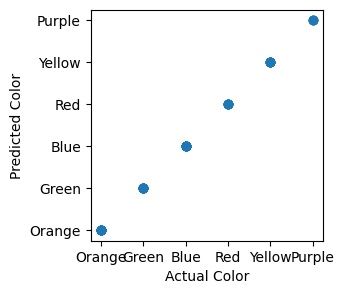

In [ ]:
reverse_onehot = {0:'Red',1:'Orange',2:'Yellow',3:'Green',4:'Blue',5:'Purple'}

max_index = model.predict(np.squeeze(rgb_test))
label_index = np.squeeze(tf.argmax(max_index,axis=1).numpy())
color_test = np.squeeze(color_test)

mapper = np.vectorize(lambda x: reverse_onehot.get(x,x))
color_pred = mapper(label_index)
color_test = mapper(color_test)

result = color_pred == color_test
score = np.sum(result==True)/len(result)*100
print(f'Accuracy: {round(score,2)}%')

plt.figure(figsize=(3,3))
plt.scatter(color_test,color_pred)
plt.xlabel('Actual Color')
plt.ylabel('Predicted Color')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Orange


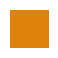

In [ ]:
labels = ['Red','Orange','Yellow','Green','Blue','Purple']

test_hex = '#de8209'.lstrip('#')
test_rgb = tf.constant([int(test_hex[i:i+2],16) for i in (0,2,4)]).numpy().tolist()
prediction = model.predict(np.array([test_rgb]))
label_index = tf.argmax(prediction,axis=1).numpy().item()

print(labels[label_index])
plt.figure(figsize=(0.5,0.5))
plt.axis('off')
plt.imshow([[test_rgb]])
plt.show()